1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [8]:
import numpy as np
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
cov = np.mean(zp*ks)- np.mean(zp)*np.mean(ks)
print(cov, np.cov(zp,ks, ddof = 0))


9157.839999999997 [[ 3494.64  9157.84]
 [ 9157.84 30468.89]]


In [12]:
corrcoef = cov/(np.std(zp)*np.std(ks))
print(corrcoef, np.corrcoef(zp,ks))

0.8874900920739158 [[1.         0.88749009]
 [0.88749009 1.        ]]


2.Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [29]:
from scipy.stats import norm
from scipy import stats 
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
x = np.mean(iq)
v = (stats.t.ppf((1+0.95)/2, 10-1))*np.std(iq, ddof = 1)/np.sqrt(10)
print(x - v, x+v)

110.55608365158724 125.64391634841274


3.Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического
ожидания с надежностью 0.95.

In [31]:
mu = 174.2
n = 27
var = 25
print(mu+(norm.ppf(0.9750)*np.sqrt(25)/np.sqrt(n)),mu-(norm.ppf(0.9750)*np.sqrt(25)/np.sqrt(n)))

176.08597622346028 172.3140237765397


4.EDA (рассчитать описательные статистики+ графический анализ с выводами)

In [139]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score


# 3. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [140]:
data = pd.read_csv('Stores.csv')

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


# 1. Распределение целевой переменной
Предполагается, что целевая переменная по которой будут строятся все предположения это количество покупателей в день.

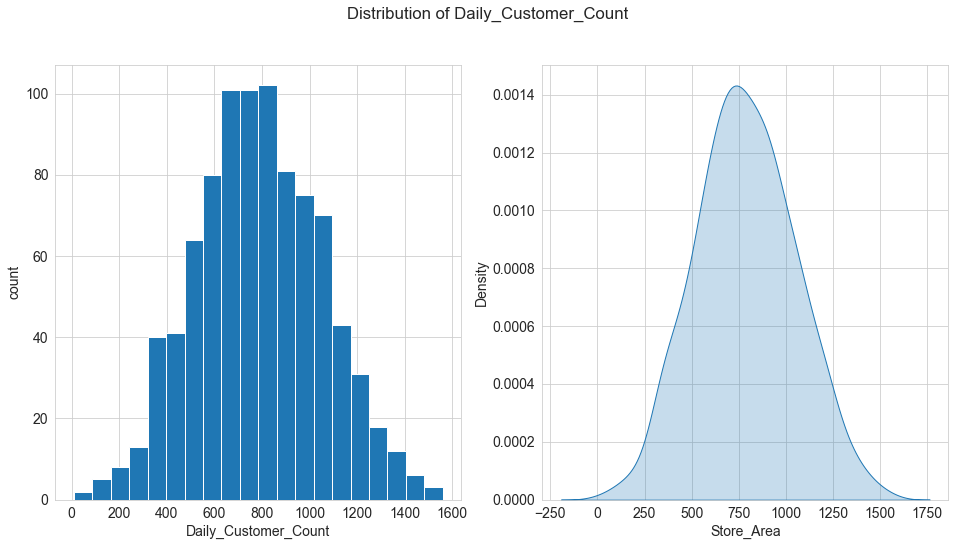

In [142]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
data['Daily_Customer_Count'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Daily_Customer_Count')

plt.subplot(122)
sns.kdeplot(data['Daily_Customer_Count'], shade=True, legend=False)
plt.xlabel('Store_Area')

plt.suptitle('Distribution of Daily_Customer_Count')
plt.show()

In [143]:
area_mean = round(data['Daily_Customer_Count'].mean(), 2)
area_median = data['Daily_Customer_Count'].median()
area_mode = data['Daily_Customer_Count'].mode()[0]
print(area_mode)

670


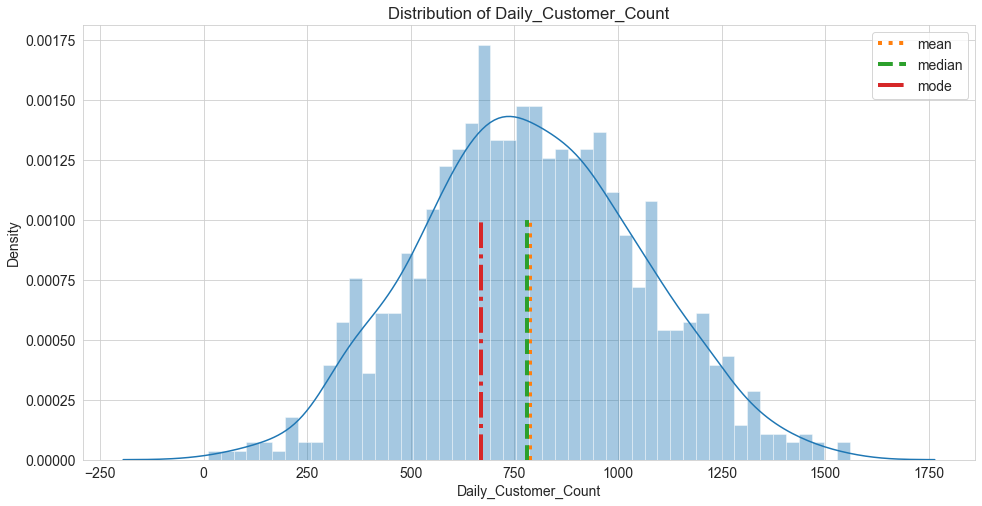

In [144]:
plt.figure(figsize = (16, 8))

sns.distplot(data['Daily_Customer_Count'], bins=50)

y = np.linspace(0, 0.001, 10)
plt.plot([area_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([area_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([area_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Daily_Customer_Count')
plt.legend()
plt.show()

Из графиков видно, что переменная имеет нормальное распределение, без выбросов со среднем значение 786.35, медианой 780.0 и модой 670

2. Анализ признаков
Store_Area. Предположим, что площадь магазина имеет прямую зависимость с количеством покупателей в день.


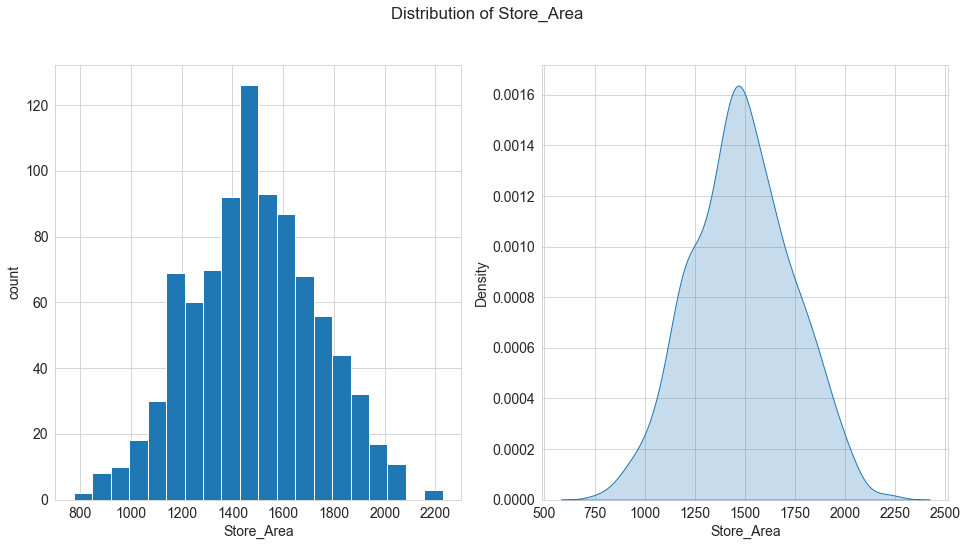

In [145]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
data['Store_Area'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Store_Area')

plt.subplot(122)
sns.kdeplot(data['Store_Area'], shade=True, legend=False)
plt.xlabel('Store_Area')

plt.suptitle('Distribution of Store_Area')
plt.show()

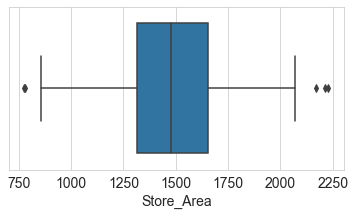

In [151]:
plt.figure(figsize=(6, 3))

sns.boxplot(data['Store_Area'], whis=1.5)

plt.xlabel('Store_Area')
plt.show()

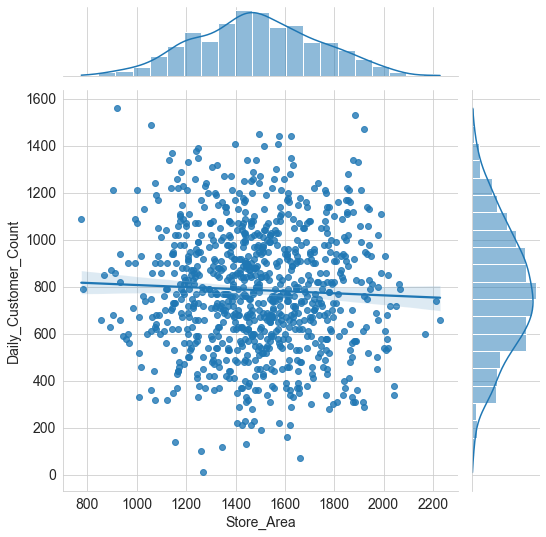

In [152]:
grid = sns.jointplot(data['Store_Area'], data['Daily_Customer_Count'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

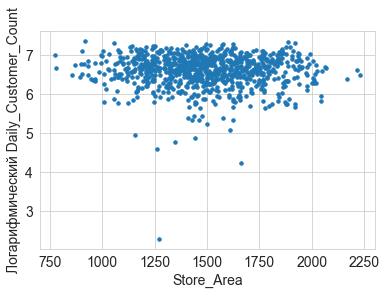

In [155]:
xs = data['Store_Area']
ys = data['Daily_Customer_Count'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Store_Area')
plt.ylabel('Логарифмический Daily_Customer_Count')
plt.show()

Из графиков видно, что линейной зависимости между двумя переменными нет. Все переменные имеют нормальное распределение.

array([[<AxesSubplot:title={'center':'Store ID '}>,
        <AxesSubplot:title={'center':'Store_Area'}>],
       [<AxesSubplot:title={'center':'Items_Available'}>,
        <AxesSubplot:title={'center':'Daily_Customer_Count'}>],
       [<AxesSubplot:title={'center':'Store_Sales'}>, <AxesSubplot:>]],
      dtype=object)

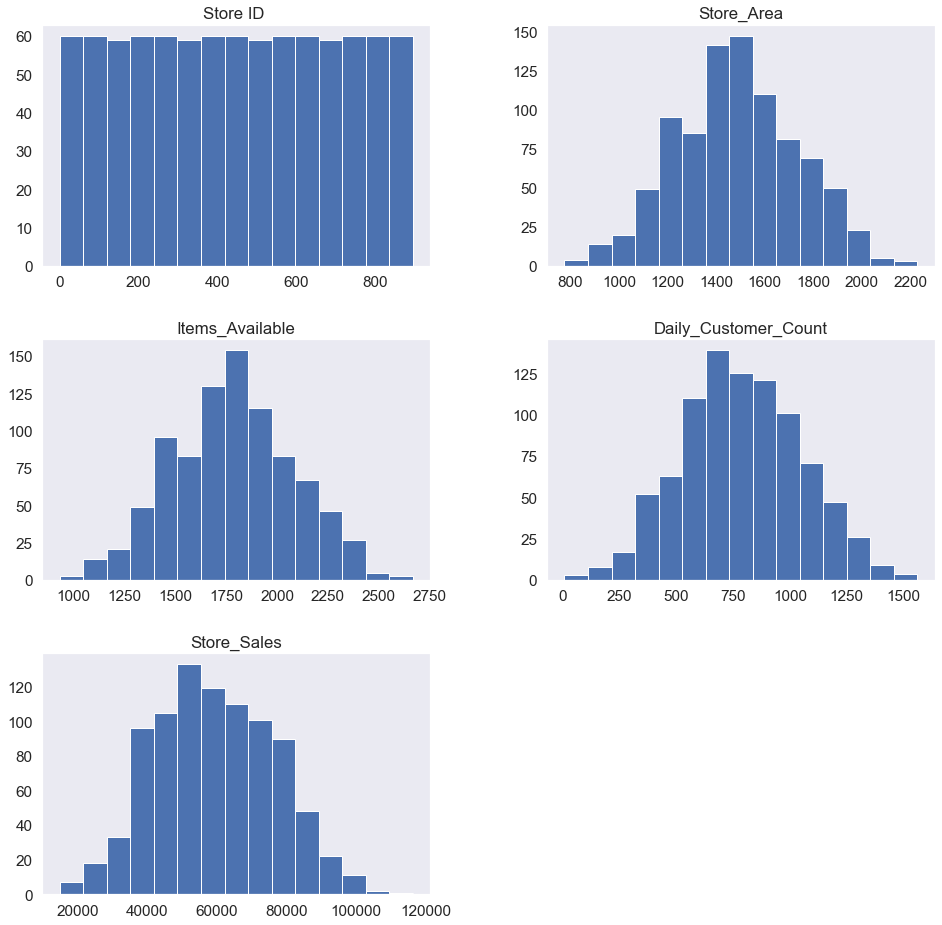

In [157]:
data.hist(figsize=(16,16), bins=15
                        , grid=False)

3. Посмотрим матрицу корреляции, чтобы увидеть между какими величинами  есть линейная зависимость.

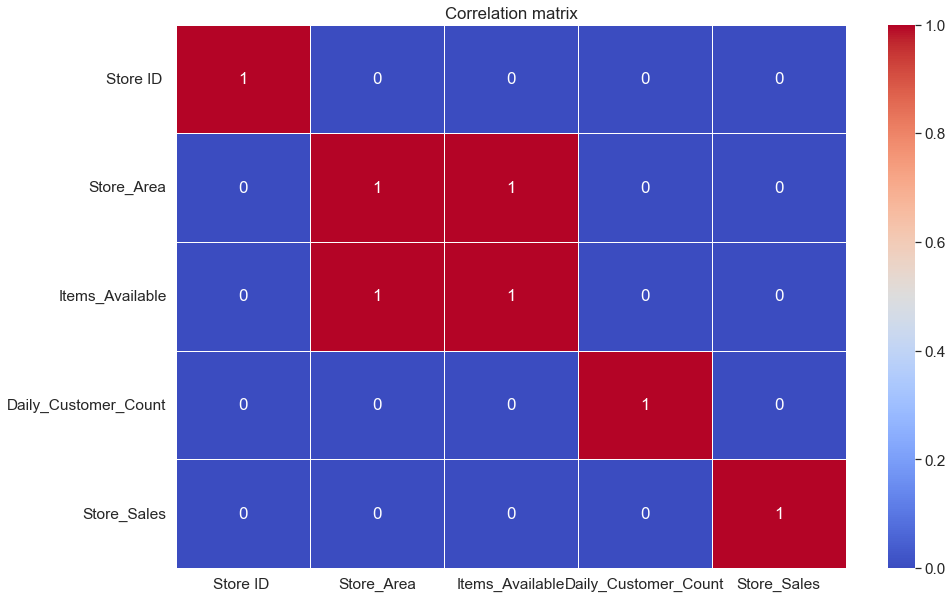

In [158]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

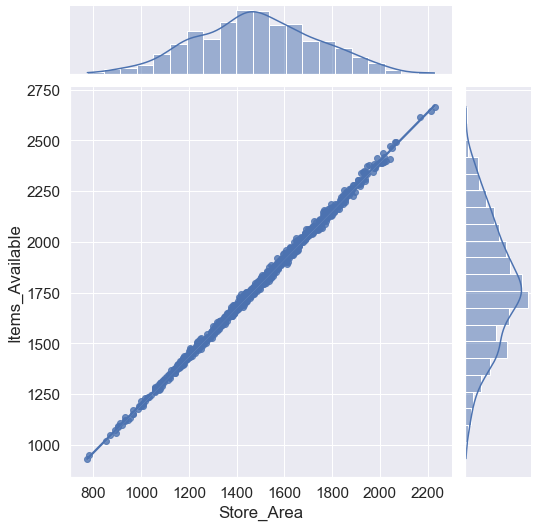

In [161]:
grid = sns.jointplot(data['Store_Area'], data['Items_Available'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Из графиков видно, что два признака имеют r = 1, следовательно можно объединить признак в один общий. Больше линейных взаимосвязей нет.